In [1]:
import os           
import random       

import numpy as np   
import pandas as pd  

from skimage import io 

from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt        
import seaborn as sns

In [1]:
import torch

In [ ]:
!pip uninstall torchvision

In [2]:
def matrix_confusion(yt, yp):
    data = {'Y_Real': yt,
            'Y_Prediccion': yp}

    df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
    confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

    plt.show()

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filename  5063 non-null   object
 1   class_number    5063 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.2+ KB


In [5]:
data['class_number'].value_counts(sort=False)  

class_number
0    1469
1    3594
Name: count, dtype: int64

Class 0 belongs to Healthy Tissue y Class 1 to Cancerous Tissue

In [6]:
Y = data['class_number']

In [7]:
data['image_filename']

0          im_4_0.png
1         im_21_0.png
2          im_9_0.png
3          im_8_0.png
4         im_15_0.png
            ...      
5058    im_114_55.png
5059      im_7_55.png
5060     im_52_55.png
5061     im_10_55.png
5062    im_111_55.png
Name: image_filename, Length: 5063, dtype: object

In [8]:
path = "C:\\Users\\Tanishq\\QCNNCancerBinaryClassifier\\Images\\"

In [9]:
%time  img = data['image_filename'].apply(lambda x: io.imread(path + x, as_gray=True))

CPU times: total: 33 s
Wall time: 34.4 s


- Dimension 0: 260 up-to-down pixels rows
- Dimension 1: 260 left-to-right pixel columns

####  Images to vectors

In [10]:
img.shape

(5063,)

In [11]:
img[0].shape

(260, 260)

In [12]:
IMG = np.stack(img, axis=0)    
IMG.shape

(5063, 260, 260)

Then flatten the 2D matrix (260x260 pixels) of each image, to obtain one vector per image. 

In [13]:
X = IMG.reshape(5063, -1) # se puede poner 67600 en vez de -1
X.shape

(5063, 67600)

##### Image Visualizer

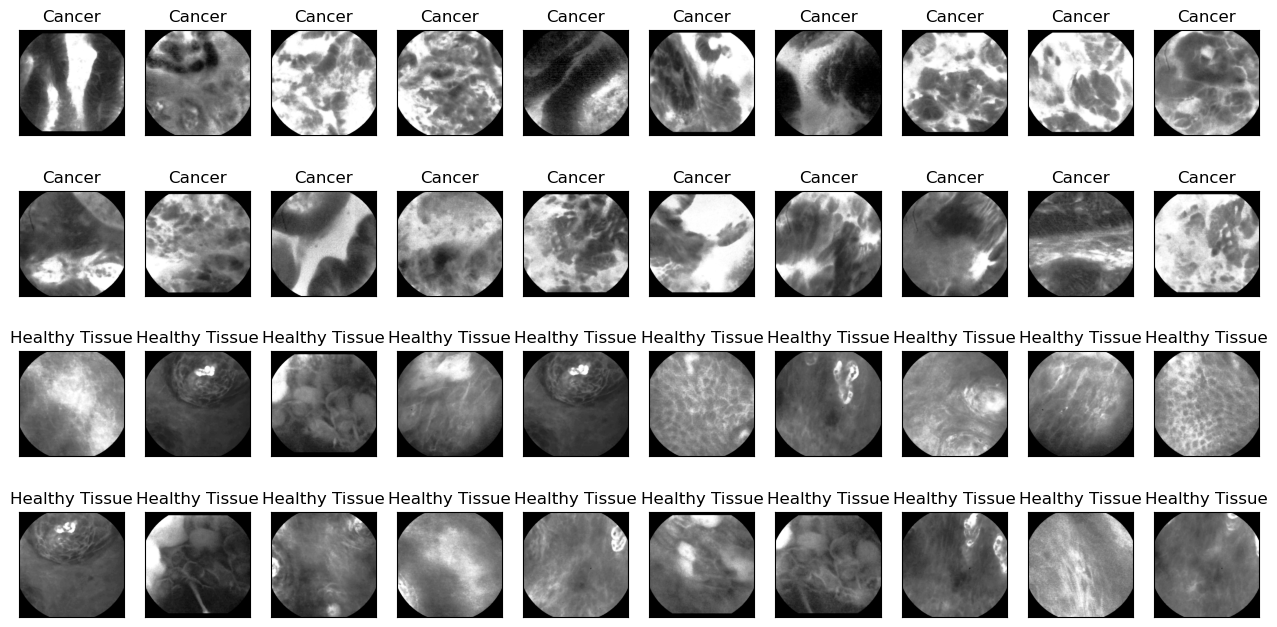

In [14]:
byClass = data.groupby('class_number')

n = 20
c = random.sample(byClass.get_group(1).index.tolist(), n)
s = random.sample(byClass.get_group(0).index.tolist(), n)


fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot(rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('Cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('Healthy Tissue')
        plt.xticks([])
        plt.yticks([])
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [16]:
print("Training set")
print("X: ",X_train.shape)
print("Y: ",y_train.shape)

Training set
X:  (3544, 67600)
Y:  (3544,)


In [17]:
unique, counts = np.unique(y_train, return_counts=True)
print('Healthy Tissue:        ', counts[0],'\nCancer: ', counts[1],'\n')

Healthy Tissue:         1043 
Cancer:  2501 



In [18]:
print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)

Test set
X:  (1519, 67600)
Y:  (1519,)


In [19]:
unique, counts = np.unique(y_test, return_counts=True)
print('Healthy Tissue:         ', counts[0],'\nCancer: ', counts[1],'\n')

Healthy Tissue:          426 
Cancer:  1093 



In [20]:
model_p = Perceptron(max_iter=50, random_state=0, verbose=True)
model_p.fit(X_train,y_train) 

-- Epoch 1
Norm: 1123.26, NNZs: 67600, Bias: -39.000000, T: 3544, Avg. loss: 1641.286726
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 1709.08, NNZs: 67600, Bias: -56.000000, T: 7088, Avg. loss: 1415.700003
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 2155.80, NNZs: 67600, Bias: -69.000000, T: 10632, Avg. loss: 1231.936834
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 2616.13, NNZs: 67600, Bias: -76.000000, T: 14176, Avg. loss: 1124.851144
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 3021.59, NNZs: 67600, Bias: -75.000000, T: 17720, Avg. loss: 1133.721658
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 3379.11, NNZs: 67600, Bias: -74.000000, T: 21264, Avg. loss: 971.851823
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 3724.07, NNZs: 67600, Bias: -66.000000, T: 24808, Avg. loss: 937.594908
Total training time: 1.81 seconds.
-- Epoch 8
Norm: 4026.70, NNZs: 67600, Bias: -68.000000, T: 28352, Avg. loss: 855.373414
Total training time: 2.12 seconds.
-- Ep

Perceptron(max_iter=50, verbose=True)

In [21]:
print("Train Set Accuracy: %.2f%%" % (model_p.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_p.score(X_test, y_test)*100.0))

Train Set Accuracy: 95.49%
Test Set Accuracy: 90.19%


In [22]:
y_pred  = model_p.predict(X_test)

In [23]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 90.19%


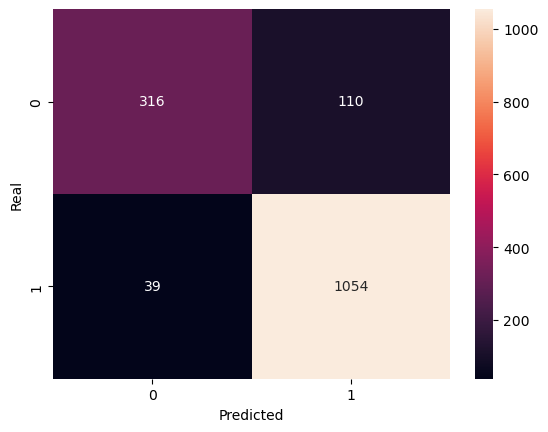

In [24]:
matrix_confusion(y_test,y_pred)

In [25]:
model_mp1 = Perceptron(max_iter=1000,  random_state=0, verbose=False, alpha=0.000001, penalty='l2') # Adds L2 penalty
model_mp1.fit(X_train,y_train) 

print("Train Set Accuracy: %.2f%%" % (model_mp1.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_mp1.score(X_test, y_test)*100.0))

Train Set Accuracy: 98.59%
Test Set Accuracy: 92.03%


In [26]:
y_pred = model_mp1.predict(X_test) 

In [27]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 92.03%


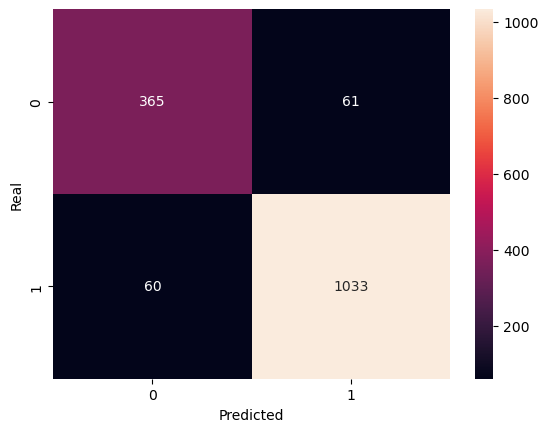

In [28]:
matrix_confusion(y_test,y_pred)

# QML QCNN

In [31]:
import torch
import torchvision
from torch import Tensor
from torch import cat
from torch.autograd.grad_mode import no_grad
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss, BCELoss, CrossEntropyLoss, MSELoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F
from torchviz import make_dot
from torchsummary import summary


# Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

In [54]:
from qiskit.quantum_info import DensityMatrix, entanglement_of_formation
from qiskit.visualization import plot_state_city

In [32]:
train_data = torchvision.datasets.ImageFolder('C:\\Users\\Tanishq\\QCNNCancerBinaryClassifier\\Imagenes_Clasificadas_Random_Split\\Train', transform=transforms.Compose([transforms.ToTensor()]))
test_data = torchvision.datasets.ImageFolder('C:\\Users\\Tanishq\\QCNNCancerBinaryClassifier\\Imagenes_Clasificadas_Random_Split\\Test', transform=transforms.Compose([transforms.ToTensor()]))

In [33]:

train_data[0][0].shape

torch.Size([3, 260, 260])

In [34]:

train_loader = DataLoader(train_data, shuffle=True, batch_size=1)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

In [35]:
# False is no cancer (0) and True, yes (1)
print((train_loader.dataset.class_to_idx))

{'False': 0, 'True': 1}


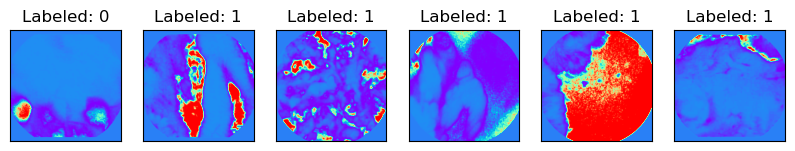

In [36]:

n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 10))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap=plt.cm.rainbow)
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title(f"Labeled: {targets[0].item()}")

    n_samples_show -= 1

In [73]:
from qiskit.providers.basic_provider import BasicProvider
 
provider = BasicProvider()
qi = provider.get_backend("basic_simulator")

In [69]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes

In [85]:
from qiskit_machine_learning.neural_networks import TwoLayerQNN

ImportError: cannot import name 'TwoLayerQNN' from 'qiskit_machine_learning.neural_networks' (C:\Users\Tanishq\anaconda3\Lib\site-packages\qiskit_machine_learning\neural_networks\__init__.py)

In [181]:
def create_qnn():
    feature_map = ZFeatureMap(2)

    ansatz = RealAmplitudes(2, reps=1)
    # Combining the feature map and ansatz
    circuit = QuantumCircuit(2)
    circuit.compose(feature_map, range(2), inplace=True)
    circuit.compose(ansatz, range(2), inplace=True)

    observable = SparsePauliOp.from_list([("Z" + "I" * 1, 1)])

    # we decompose the circuit for the QNN to avoid additional data copying
    qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    )
    return qnn

In [182]:
qnn = create_qnn()

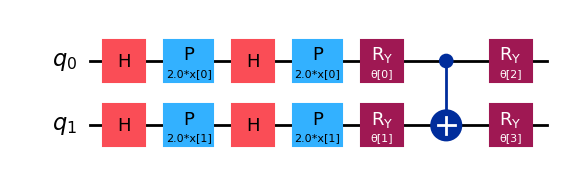

In [183]:
qnn.circuit.draw("mpl")

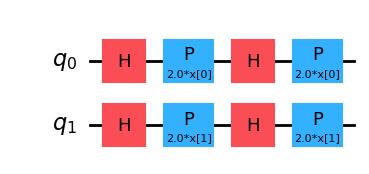

In [184]:
feature_map.decompose().draw(output='mpl')

In [185]:
qnn.circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3])])

In [186]:
params = np.random.uniform(-1, 1, len(qnn.circuit.parameters))
params

array([ 0.78833142, -0.26037345, -0.46904562,  0.13511992, -0.47366029,
       -0.32320069])

In [187]:
from qiskit.circuit import Parameter

In [188]:
rho_01 = DensityMatrix.from_instruction(qnn.circuit.assign_parameters(params))

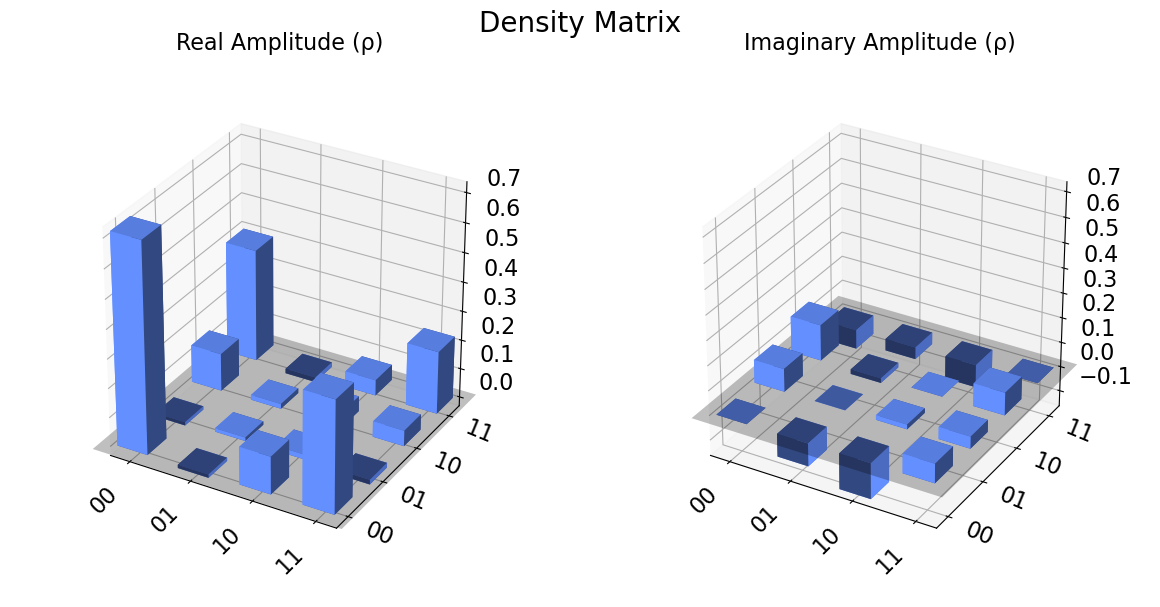

In [189]:
plot_state_city(rho_01.data, title='Density Matrix', figsize=(12,6))

In [190]:
gamma_p = rho_01.purity()
display(rho_01.draw('latex', prefix='\\rho_p = '))
print("State purity: ", np.round(np.real(gamma_p), 3))

<IPython.core.display.Latex object>

State purity:  1.0


In [191]:
print(f'{entanglement_of_formation(rho_01):.4f}')

0.7675


In [192]:
class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=3)
        self.dropout = Dropout2d()
        self.fc1 = Linear(508032, 128)
        self.fc2 = Linear(128, 2) # QNN binary input
        self.qnn = TorchConnector(qnn) # use TorchConnector to bind quantum node and classic convolutional layers
        self.fc3 = Linear(1, 1)  # Quantum Circuit Output

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # QNN in foward section
        x = self.fc3(x)
        return cat((x, 1 - x), -1)

model = Net(qnn)

In [193]:
model = model.to('cpu')

In [194]:
print(model)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=508032, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (qnn): TorchConnector()
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)


In [195]:
summary(model, (3, 260, 260), batch_size=-1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 256, 256]           9,728
            Conv2d-2        [-1, 128, 126, 126]         147,584
         Dropout2d-3          [-1, 128, 63, 63]               0
            Linear-4                  [-1, 128]      65,028,224
            Linear-5                    [-1, 2]             258
    TorchConnector-6                    [-1, 1]               4
            Linear-7                    [-1, 1]               2
Total params: 65,185,800
Trainable params: 65,185,800
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.77
Forward/backward pass size (MB): 83.38
Params size (MB): 248.66
Estimated Total Size (MB): 332.82
----------------------------------------------------------------
